In [2]:
import pandas as pd
df = pd.read_csv('../train.csv')

In [3]:
#Initial look at dataframe columns:
#Survival: 0 = dead, 1 = alive
#P class = proxy for socioeconomic class, 1 = upper, 2 = middle, 3 = lower
#sibsp = # of siblings and spouses on the titanic
#parch = # of parents and children aboard
#port of embarkation, either C,Q,S
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#There are 891 passengers in the training data, 342 survived (38%)
print(len(df))
print(sum(df['Survived']))

891
342


In [18]:
#18% of men survived, 74% of women survived
male_survival = sum(df[df['Sex'] == 'male']['Survived']) / len(df[df['Sex'] == 'male']) 
print(male_survival)
female_survival = sum(df[df['Sex'] == 'female']['Survived']) / len(df[df['Sex'] == 'female']) 
print(female_survival)

0.18890814558058924
0.7420382165605095


In [23]:
#Survival rate clearly higher for higher for wealthier people
for i in df['Pclass'].unique():
    num = sum(df[df['Pclass'] == i]['Survived']) / len(df[df['Pclass'] == i]) 
    print("Survival rate in class " + str(i) + ": " + str(num))

Survival rate in class 3: 0.24236252545824846
Survival rate in class 1: 0.6296296296296297
Survival rate in class 2: 0.47282608695652173


In [ ]:
#40 people use the "master" title
len(df[df['Name'].str.contains('Master')])

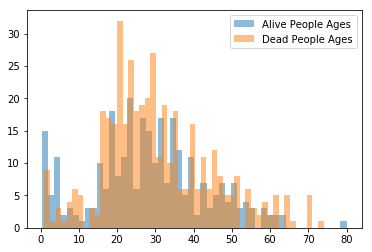

In [13]:
import matplotlib.pyplot as plt
plt.hist(df[df['Survived'] == 1]['Age'], 50, alpha=0.5, label='Alive People Ages')
plt.hist(df[df['Survived'] == 0]['Age'], 50, alpha=0.5, label='Dead People Ages')
plt.legend(loc='upper right')
plt.show()
#Does't seem like age is necessarily a great predictor by itself, maybe interaction with gender?

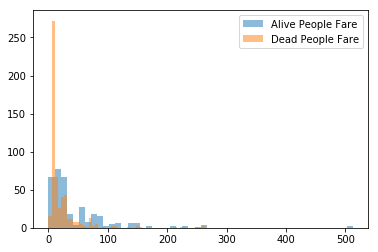

In [19]:
plt.hist(df[df['Survived'] == 1]['Fare'], 50, alpha=0.5, label='Alive People Fare')
plt.hist(df[df['Survived'] == 0]['Fare'], 50, alpha=0.5, label='Dead People Fare')
plt.legend(loc='upper right')
plt.show()
#Seems that most of the dead people were lower fare passengers